In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

In [2]:
data_df = pd.read_csv('./Data/sam.funny_cleaning.csv')

In [3]:
df = data_df
df['comments_full']

0      [{'comment_id': '733265815331693', 'comment_ur...
1      [{'comment_id': '1114583793258489', 'comment_u...
2      [{'comment_id': '3230542493905111', 'comment_u...
3      [{'comment_id': '652742957040839', 'comment_ur...
4      [{'comment_id': '830446935489886', 'comment_ur...
                             ...                        
187    [{'comment_id': '734487354633468', 'comment_ur...
188    [{'comment_id': '902512580760361', 'comment_ur...
189    [{'comment_id': '480584774152328', 'comment_ur...
190    [{'comment_id': '1154036291926134', 'comment_u...
191    [{'comment_id': '678303613913268', 'comment_ur...
Name: comments_full, Length: 192, dtype: object

### T√°ch comment v√† t√™n nick comment ra kh·ªèi tr∆∞·ªùng comments_full

In [4]:
to_comments_full = lambda t:t.split(',')
comments_full = df['comments_full'].apply(to_comments_full)
commenters_name = []
comments_text = []
for i in range(0, len(comments_full)):
    for j in range(0, len(comments_full[i])):
        if comments_full[i][j].find('commenter_name') >= 0:
            tmp = comments_full[i][j].split(': ')[1]
            tmp = tmp.replace('\'',"")
            commenters_name.append(tmp)
        if comments_full[i][j].find('comment_text') >= 0:
            tmp = comments_full[i][j].split(': ')[1]
            tmp = tmp.replace('\'',"")
            comments_text.append(tmp)


### Top 10 t√†i kho·∫£n comment nhi·ªÅu nh·∫•t

In [5]:
df_commenters_name = pd.DataFrame(commenters_name)
top10_comments = df_commenters_name.value_counts().head(10)
index_as_strings = [str(name[0]) for name in top10_comments.index]
cleaned_index = [name.replace("(", "").replace(")", "").replace(",", "") for name in index_as_strings]
top10_comments.index = cleaned_index
top10_comments = pd.DataFrame({'T√†i kho·∫£n': top10_comments.index, 'S·ªë l∆∞·ª£ng comment': top10_comments.values})
top10_comments

T√†i kho·∫£n  S·ªë l∆∞·ª£ng comment
0         Qu·ªëc C∆∞·ªùng                73
1           Luo Tian                60
2           Long Ken                54
3       Gia ƒë√¨nh Ng·ªô                35
4      L√™ Quang Th√°i                28
5     Phan Nh·∫≠t Minh                23
6             L√™ Huy                22
7       Phero Nguyen                21
8  Thinh John Nguyen                21
9        L√Ω T·∫•n Vinh                20

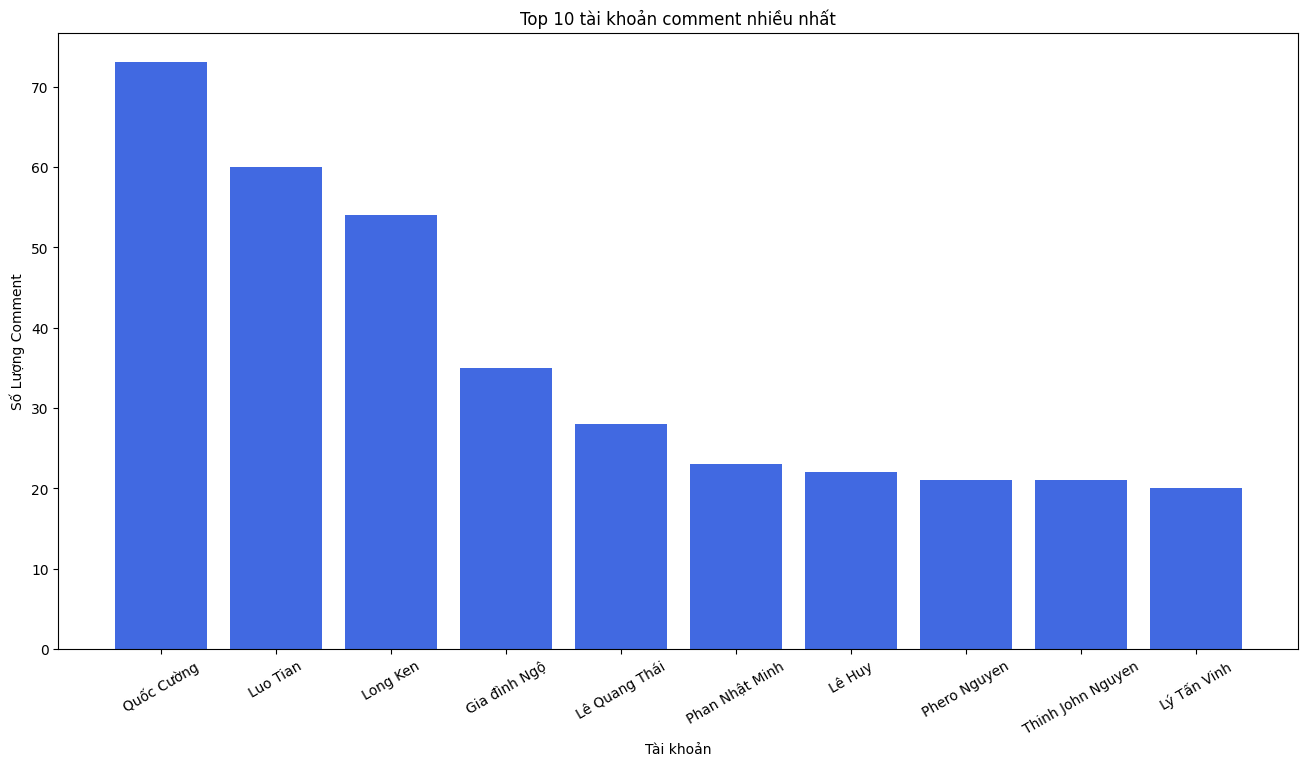

In [6]:
plt.figure(figsize=(16, 8))
plt.bar(top10_comments['T√†i kho·∫£n'], top10_comments['S·ªë l∆∞·ª£ng comment'], color='royalblue') 
plt.title('Top 10 t√†i kho·∫£n comment nhi·ªÅu nh·∫•t')
plt.xlabel('T√†i kho·∫£n')
plt.ylabel('S·ªë L∆∞·ª£ng Comment')
plt.xticks(rotation=30)
plt.show()


### C√°c t·ª´ xu·∫•t hi·ªán nhi·ªÅu nh·∫•t

In [7]:
text = str(comments_text)

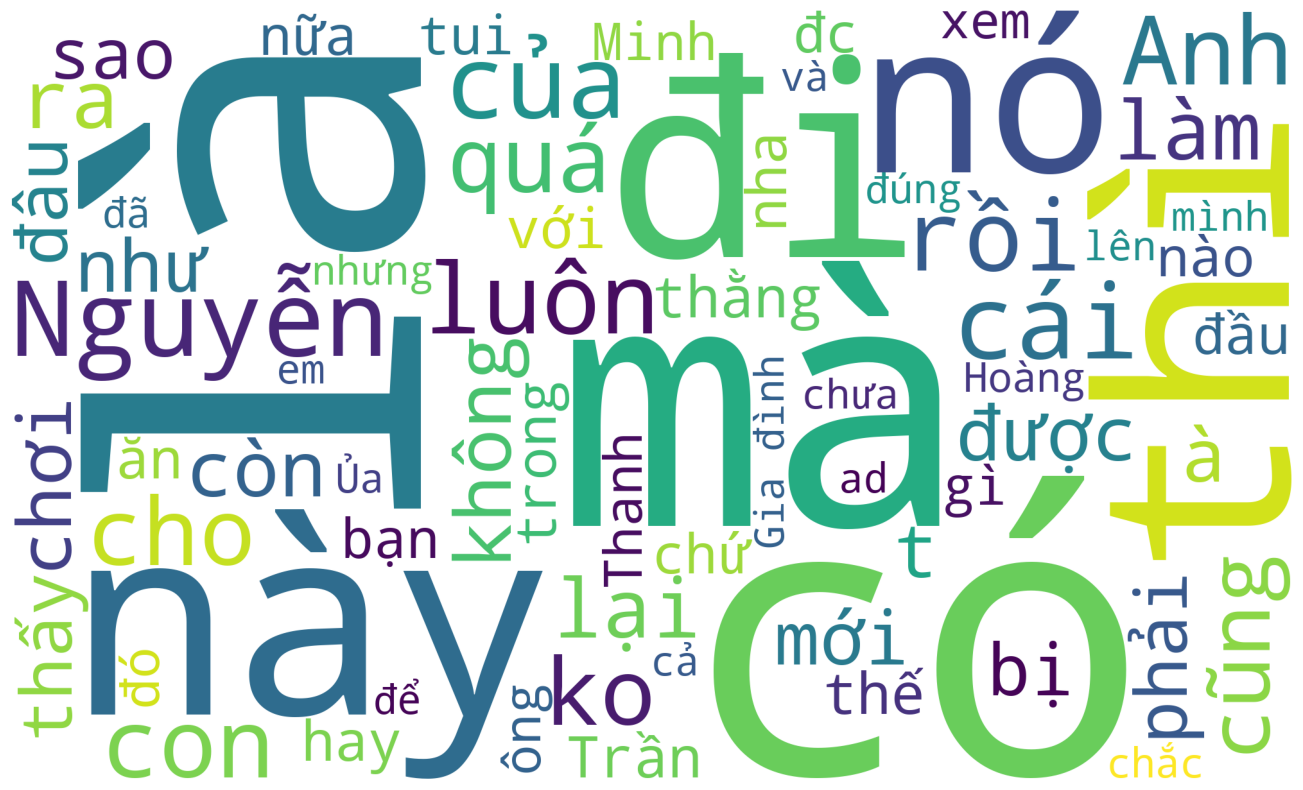

In [8]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=70,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(30,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### T√åm keyword

In [9]:
stop_words = ['ƒë√£ kh√¥ng', 'g·∫ßn h·∫øt', 't·ªè ra', 'n√≥i nh·ªè', 'th√∫ng th·∫Øng', 't·ª´ lo·∫°i', 'bao nhi√™u', 'ƒÉn l√†m', 'ph·ªâ phui', 'ch·ª© nh∆∞', 'vung thi√™n ƒë·ªãa', 'sang s√°ng', 't·∫°i ƒë√¢u', '√¥ng t·ª´', 'gi·ªØa l√∫c', 'gi·ªù ƒë√¢y', 'c√¢u h·ªèi', 'kh√¥ng ƒëi·ªÅu ki·ªán', 'kh·∫≥ng ƒë·ªãnh', 'ch·ªëc ch·ªëc', 'l·∫•y ra', 'n∆∞·ªõc xu·ªëng', 'n√≥i l√†', 'sau ƒë√≥', 'l√† ph·∫£i', 'v·ªÅ kh√¥ng', 'd√†nh d√†nh', 'l√†m tƒÉng', 'c√≥ th√°ng', 't·∫•t c·∫£ bao nhi√™u', 'nh√¨n theo', '∆° k√¨a', 'cho ƒë∆∞·ª£c', '·∫ßu ∆°', 'trong n√†y', '·ªëi gi·ªùi', 'tr√°nh kh·ªèi', '·ª© h·ª±', 'ch·∫≥ng n·ªØa', 'c·∫ßn s·ªë', 'ph·∫£i r·ªìi', 'ƒë√£ th·∫ø', 'kh√≥ ch∆°i', '·ªù ·ªù', 's·∫Ω hay', 'ƒë∆∞a chuy·ªán', 'l∆∞·ª£ng s·ªë', 'c∆° c√πng', 'cho r·∫±ng', 'l√∫c n√†y', 'quan tr·ªçng', 'ƒÉn chung', 'v√†i ƒëi·ªÅu', 'ƒëang tay', 'l√≤ng kh√¥ng', 't·ªõi n∆°i', 'ch·∫øt th·∫≠t', 'cha ch·∫£', 'tƒÉng c·∫•p', '√Ω ch·ª´ng', 'ƒë∆∞a em', 'cƒÉn t√≠nh', 'ch·∫Øc ng∆∞·ªùi', 'n√†y n·ªç', 'r√©n b∆∞·ªõc', 'm·ªói l√∫c', 'cƒÉn c·∫Øt', 'b·∫•t k·ªÉ', 'ai n·∫•y', 'ba ng√†y', 'b·∫•t qu√°', 'r√°o c·∫£', 'chu cha', 'b·∫±ng n√†o', 'ƒë·ªß n∆°i', 'th·ª±c v·∫≠y', 't·∫°i n∆°i', 'tha h·ªì', 'ƒÉn h·ªèi', 's·ª≠ d·ª•ng', 'c·∫£m ∆°n', '√†o v√†o', 'duy ch·ªâ', 'ƒë√¢u ƒë√¢y', 'ng·ªô nh·ª°', 'v√†i n∆°i', 'bi·∫øt m√¨nh', 'th∆∞·ªùng t·∫°i', 'trong m√¨nh', '√¥ k√¨a', 'tr∆∞·ªõc ƒë√¢y', 'v·ª´a l√∫c', 'ƒë√¢u c≈©ng', 'th·ªùi ƒëi·ªÉm', 't·ª´ng ·∫•y', '·ªü ƒë∆∞·ª£c', 'c√πng c·ª±c', 'kh√≥ nghƒ©', 'v√πng n∆∞·ªõc', 'qu√° tu·ªïi', 'c·∫≠t s·ª©c', 'thi·∫øu ƒëi·ªÉm', 'd·∫° kh√°ch', 'ch·∫Øc ƒÉn', 'l·∫ßn kh√°c', 't·ªôt c√πng', 'tu·∫ßn t·ª±', 'nh·ªØng l√†', 't·ª± √Ω', 'b·ªüi th·∫ø', 'th·ª•c m·∫°ng', 'tr∆∞·ªõc ng√†y', 'tu·ªët tu·ªìn tu·ªôt', 'trong ngo√†i', 'hi·ªán nay', 'd√π cho', 'thu·ªôc b√†i', 'n·ªØa khi', 'ch·ªãu ch∆∞a', 'kh√¥ng hay', 'th·∫≠t s·ª±', 'th√† r·∫±ng', 'ƒë·∫∑t m·ª©c', 'th·∫≠m t·ª´', 'nh·∫±m v√†o', 'd√π sao', 'nh∆∞ kh√¥ng', 'b·∫•y l√¢u nay', 'tuy·ªát nhi√™n', 'ng√†y ƒë·∫øn', 'th√≠ch √Ω', 'th·∫ø s·ª±', 'nghe ch·ª´ng', 'ƒë√∫ng ng√†y', 'b·ªô thu·ªôc', 'ƒë·ªÉ gi·ªëng', 'ch∆∞a d·ªÖ', '√¥ng nh·ªè', 'th·∫•y th√°ng', 'ba h·ªç', 'v√¨ ch∆∞ng', 'c√†ng hay', 'l·∫•y c√≥', 't·ª± l∆∞·ª£ng', 'th√≠ch t·ª±', 'c∆° m√†', 'th·∫≠t ra', 'th√≠ch c·ª©', 'ra ng√¥i', 'chuy·ªÉn t·ª±', '·ªü ƒë√¢y', 'xon x√≥n', 'd·∫´u r·∫±ng', 'ra tay', 'th∆∞·ªùng th√¥i', 'v√¨ r·∫±ng', 'b·∫•t k√¨', 'xin g·∫∑p', 'thu·∫ßn √°i', 'l√∫c ƒëi', 'ƒë·ªß s·ªë', 'd·ªÖ th·∫•y', 'nh·ªù ƒë√≥', 'h∆°n l√†', 'tho·∫°t nghe', 'v√≠ ph·ªèng', 'm√† l·∫°i', 'nhanh l√™n', 'ng∆∞·ªùi kh√°ch', 'qu·∫£ l√†', 'ch∆∞a d√πng', 'c·ª© ƒëi·ªÉm', 'm·ªói l·∫ßn', 'l∆∞·ª£ng t·ª´', 'n√≥i ri√™ng', 'kh√°c n√†o', 'tr·ªùi ƒë·∫•t ∆°i', 'v·ªã t·∫•t', 'b·ªè m√¨nh', 'n√≥i kh√≥', 'qu√° m·ª©c', 'v√®o v√®o', 't·ª´ t·∫°i', 'cu·ªëi c√πng', 'ph·∫£i c√°ch', 'nh·∫≠n nhau', 'ng√†y n√†y', 'ƒë√°ng l√Ω', 'tr∆∞·ªõc khi', 's·ªü dƒ©', 'do v√¨', 'th∆∞·ªùng t√≠nh', 'ƒë√∫ng v·ªõi', 'chung cho', 'm√† kh√¥ng', 'ph·∫£i bi·∫øt', '√°i ch√†', 'h·∫øt n√≥i', 'ƒë√¢u ƒë√¢u', 'ch√†nh ch·∫°nh', 'b·ªóng nhi√™n', 'c√≥ chƒÉng l√†', 'ba tƒÉng', 'tr·ª´ phi', '√¥ng t·∫°o', 'nh∆∞ qu·∫£', 'nh·∫•t nh·∫•t', 'ƒë∆∞a tay', 'ng√¥i th·ª©', 'v·ªÅ ph·∫ßn', 'tr·ªáu tr·∫°o', 'sang nƒÉm', 't·∫•m b·∫£n', 'ƒë·ªÉ ph·∫ßn', 'b·ªè l·∫°i', 't·ª´ ƒë√≥', 'v·ª´a m·ªõi', 's√¨ s√¨', 'th·∫≠m c·∫•p', 'bu·ªïi s·ªõm', 'b·ªè m·∫•t', 'hay hay', 'g√¢y gi·ªëng', 'hay tin', 'n∆°i n∆°i', 't·∫°i ƒë√¢y', 'h·∫øt c·ªßa', 'd·ªÖ g√¨', 't√≠nh c√°ch', 'v√¢ng v√¢ng', 'ch√πn ch≈©n', 'con nh√†', 'g·∫∑p kh√≥ khƒÉn', 'ƒë·ªÅu nhau', 'ƒë·∫°i lo·∫°i', 'n·∫øu nh∆∞', 'm·ªôt khi', 'trong s·ªë', 'qua ng√†y', 'kh√¥ng ai', 'n√≥i l·∫°i', 'ri√™ng t·ª´ng', 'nghƒ© xa', 'l·ªùi n√≥i', 'ch·ª© kh√¥ng ph·∫£i', 'l·∫ßn t√¨m', 'tr∆∞·ªõc ti√™n', 'c·∫£ ng∆∞·ªùi', 'trong v√πng', 't·ªõi g·∫ßn', 'qu·∫£ th·∫ø', 'th∆∞·ªùng khi', '√¥ng ·∫•y', 'th√°ng ng√†y', 'xa x·∫£', 'd·ªÖ d√πng', 'v√≠ b·∫±ng', 'chung quy', 'l·∫•y l√†m', 'th·∫•p th·ªèm', 'c√¢y n∆∞·ªõc', 'c√¥ ·∫•y', 'ƒë·∫∑c bi·ªát', 'n√†o l√†', 'v√†o kho·∫£ng', 'k·ªÉ nh∆∞', 't·∫°o ra', 'd·∫ßu sao', 'v·ªÅ n∆∞·ªõc', 'nh√≥n nh√©n', 'th√≠ch thu·ªôc', 's√°ng r√µ', 'l·∫°i n·ªØa', 'th·ª±c hi·ªán', 'ch∆∞a t·ª´ng', 'b·∫•y nay', 'c·∫•p s·ªë', 'ƒë·∫∑t l√†m', 'nh·ªõ ra', 'vung t√†n t√°n', 't·∫Øp l·ª±', 'chung cu·ªôc', 't·ª´ khi', 'tuy c√≥', 'c√≥ th·ªÉ', 'nh∆∞ th·∫ø n√†o', '·ªëi d√†o', 'd·ªÖ nh∆∞ ch∆°i', 'l√™n n∆∞·ªõc', 'l·∫•y th·∫ø', 'l√™n s·ªë', 'cho t·ªõi', 'ch·ª© c√≤n', 'tr·∫£ c·ªßa', 'ƒë·∫øn th·∫ø', 'g√¨ g√¨', 'tr∆∞·ªõc nay', 'th·∫£o h√®n', 'l√∫c ƒë√≥', 'nh·∫≠n vi·ªác', 'mang mang', 'kh√¥ng nh·ªØng', 'n√†o ph·∫£i', 'tr∆∞·ªõc ƒë√≥', 'l·ªõn nh·ªè', 'th√¨ th√¥i', 'tu·ªïi c·∫£', 'ra √Ω', 'qu√° tin', 'tuy r·∫±ng', 'd·ªÖ ng∆∞∆°i', 'con d·∫°', 'ƒë·ªÉ kh√¥ng', 'c·ª© nh∆∞', 'b√™n c·∫°nh', 't√≤ te', 'ch·ªãu t·ªët', 'kh√¥ng k·ªÉ', 'n·ª©c n·ªü', 'l·∫•y ƒë∆∞·ª£c', 'b·ªè xa', 'l·∫•y gi·ªëng', 't·ª± t√≠nh', 'ƒë·∫øn khi', 'v·ª´a r·ªìi', 'ch·∫øt ti·ªát', 'sau c√πng', 'cao th·∫ø', 'sao ƒëang', 'qua chuy·ªán', 'ch·ªâ l√†', 'c·∫£ ƒÉn', 'ba b·∫£n', 'ng·ªìi b·ªát', 'l√†m d·∫ßn d·∫ßn', 'mang n·∫∑ng', 'r·ªìi ƒë√¢y', 'ƒÉn s√°ng', 'c·∫£ nghƒ©', 'cho ƒë·∫øn khi', 't√¨nh tr·∫°ng', 'ph·∫ßn n√†o', 'tanh tanh', 'kh√¥ng g√¨', 'ƒë∆∞a cho', 'g√¨ ƒë√≥', 'sao b·∫±ng', 'ra g√¨', 'b∆∞·ªõc t·ªõi', 'ti·∫øp t·ª•c', 'l·∫•y c·∫£', 'chung c·ª•c', 'xem ra', 'v·∫≠y m√†', 'nh·∫±m khi', 'tr·∫£ ngay', 'c√≥ ng∆∞·ªùi', 'l√™n cao', 'ph·∫ßn vi·ªác', 'thu·ªôc l·∫°i', 'h·∫øt c·∫£', 'b·∫•t th√¨nh l√¨nh', 'tr·ª±c ti·∫øp', '·∫•y l√†', 'ngay l·∫≠p t·ª©c', '·ªü v√†o', 'ai ƒë√≥', 'c√πng tu·ªïi', 'd√π r·∫±ng', 'v·ªën dƒ©', 'b·ªüi ai', 'th·ªët nhi√™n', 't·ª´ng ph·∫ßn', 'b·∫±ng ng∆∞·ªùi', 's·ªë ng∆∞·ªùi', 'l·∫°i ng∆∞·ªùi', 'v√†i nh√†', 'nh·ªù c√≥', 'khi tr∆∞·ªõc', 'hay sao', 'n·ªØa r·ªìi', 'b·∫•y l√¢u', 'ƒë·ªìng th·ªùi', 'd·ªü ch·ª´ng', 'ƒë√°nh gi√°', 't√¨m b·∫°n', 't√™n h·ªç', 'm·∫•t c√≤n', 'kh√°c nhau', 'd·∫´u m√†', 'ng·ªìi sau', 'ch·ªâ t√™n', 'ng·ªìi tr·ªát', 'l√™n ng√¥i', 'd√πng h·∫øt', 'v√†o ƒë·∫øn', 'c≈©ng v·∫≠y th√¥i', 'n∆∞·ªõc ƒÉn', 'cho n√™n', 'ph√≠a b√™n', 'ƒÉn cu·ªôc', 'n√≥i l√™n', 'bi·∫øt ƒë√¢u ƒë·∫•y', 'ƒë√°o ƒë·ªÉ', 'gi·ªù ƒë·∫øn', 'ƒëang th√¨', 'li√™n quan', 'nhi√™n h·∫≠u', 'n·∫øu c√≥', 'tha h·ªì ch∆°i', 'ng√µ h·∫ßu', 't·ª´ng nh√†', 'l·∫ßn sang', 'ch√∫ d·∫´n', 'ƒë·ªß d√πng', 'ch·∫Øc h·∫≥n', 'ƒë∆∞·ª£c l·ªùi', 'vƒÉng t√™', '√°i d√†', 'ch·ªõ kh√¥ng', 'ch√≠nh ƒëi·ªÉm', 'd·ªÖ s·ª£', 'chao √¥i', 'khi n√™n', 'b·∫±ng ·∫•y', 'nh∆∞ ch∆°i', '√¥i chao', 'h·ªç xa', 'c·∫≠t l·ª±c', 'c·ª• th·ªÉ l√†', 'ph·∫£i l·ªùi', 'chƒÉng n·ªØa', 'ƒë·∫ßy nƒÉm', 'c√≥ s·ªë', '∆°i l√†', 'l√∫c kh√°c', 'nghe kh√¥ng', 'con t√≠nh', 'ƒë·∫ßu ti√™n', 's√°ng th·∫ø', 'th·ªëc th√°o', 'th·∫ø ra', 'v·∫≠y th√¨', 'c√≤n v·ªÅ', 'ngay c·∫£', 'h·∫øt √Ω', 'xu·∫•t hi·ªán', 'ch∆∞a ch·∫Øc', 'm·ªçi gi·ªù', 'nh·∫•t m·ª±c', 'sao b·∫£n', 's·∫Øp ƒë·∫∑t', 'l√†m l√≤ng', 'ƒÉn ng·ªìi', 'v·∫≠y ∆∞', 'ch·ª© g√¨', 'x·ª≠ l√Ω', 'v·ª´a khi', 'nh·∫•t lu·∫≠t', 'tr√™n b·ªô', 'b·∫•y ch·∫ßy', 'l·∫°i qu·∫£', 't√† t√†', 'c∆° h·ªì', 'nh·ªè ng∆∞·ªùi', 'l√†m n√™n', 'b√¢y b·∫©y', 'n·∫øu v·∫≠y', 'ng∆∞·ªùi kh√°c', 'ti·∫øp ƒë√≥', 'ph√≠a d∆∞·ªõi', 'bi·∫øt ƒë√¢u ch·ª´ng', 'd·∫° d√†i', 'c√≤n n·ªØa', 'c√≥ c∆°', 't√¥i con', 'qu√° l·ªùi', 'c√°ch ƒë·ªÅu', 'ƒë·ªÉ ƒë·∫øn n·ªói', 'th·∫ø n√™n', 'xa xa', 'ho√†n to√†n', 'm·ªü mang', 'nh·∫•t t√¢m', 'v√†i ng∆∞·ªùi', 'ph·∫£i khi', 'v√¥ lu·∫≠n', 'th·ªùi gian t√≠nh', 's√°ng √Ω', 'thanh kh√¥ng', 'm·ªôt l√∫c', 'n√≥i ph·∫£i', 'chuy·ªÉn ƒë·∫°t', 'ƒë·∫ßy tu·ªïi', 'tay quay', 'chung quy l·∫°i', 'ch·∫Øc ch·∫Øn', 'bao gi·ªù', 't·ª´ cƒÉn', 'th√°i qu√°', 'l·∫•y v√†o', 'ch·ª© l·ªã', 'bi·∫øt vi·ªác', 'gi·ªØ l·∫•y', 'ƒë∆∞a t·ªõi', 'ti·ªán th·ªÉ', 'khi n√†o', 'nh∆∞ v·∫≠y', 'v·ª´a qua', 'veo veo', 'cho bi·∫øt', 'ng√¥i nh√†', 'nh·ªØng ai', 'n√™n tr√°nh', 'ƒë√£ ƒë·ªß', 'tuy v·∫≠y', 'nh·∫•t thi·∫øt', 'ƒÉn ch·∫Øc', 'kh√¥ng c√≥ g√¨', 'bi·∫øt bao nhi√™u', 'ƒë·ªÅu b∆∞·ªõc', 'gi·ªù l√¢u', 'b·ªè vi·ªác', 'ƒë·∫°i ph√†m', 'l·∫°i ƒÉn', 'qua ƒëi', 'ho·∫∑c l√†', 'ngay b√¢y gi·ªù', 'l√†m th·∫ø n√†o', 'nh·∫•t ƒë·ªãnh', 'nghe th·∫•y', 'tr∆∞·ªõc tu·ªïi', 'm√† v·∫´n', 'tƒÉm t·∫Øp', 'v·ªÅ tay', '·∫° ∆°i', 'nh·∫≠n ƒë∆∞·ª£c', 'ph√≠a tr∆∞·ªõc', 'ch·ªâ c√≥', 'tr√°nh ra', 'ra ng∆∞·ªùi', 'kh√¥ng ƒë·∫ßy', 'nghe hi·ªÉu', 'ph√≠a tr√™n', 'l·∫ßn l·∫ßn', 't·ªè v·∫ª', 'ba ng√¥i', 'ph√≠a b·∫°n', 'trong khi', 'th√¨ ra', 'ƒë√¢y n√†y', 'b·ªè ri√™ng', 'l√∫c l√¢u', 'b·∫£n √Ω', 'b·∫•y gi·ªù', 'nghe ƒë∆∞·ª£c', 'kh√°c kh√°c', 'c√πng t·ªôt', 'coi b·ªô', 'b√°n th·∫ø', '√¥ hay', 't√™n t·ª±', 'qua kh·ªèi', 'ƒë√£ v·∫≠y', 'ch√≠nh b·∫£n', '√≠t nhi·ªÅu', 'ƒë∆∞a xu·ªëng', 'b·ªóng ch·ªëc', 'quay l·∫°i', 'kh√¥ng bao l√¢u', 'kh√¥ng c√πng', 'n√†o ƒë√≥', 'v·∫´n th·∫ø', 'hay n√≥i', 'c√≤n nh∆∞', 'd·ªÖ th∆∞·ªùng', 'ng√†y x·ª≠a', 'v√¢ng √Ω', 'd√πng ƒë·∫øn', 'm·ªçi khi', 'nh·ªù chuy·ªÉn', 'ngay t·ª©c th√¨', 'kh√≥ th·∫•y', 'ngay khi ƒë·∫øn', 'nh·∫≠n bi·∫øt', 'ngay t·ª´', 'ra ƒë√¢y', 'ch∆∞a c√≥', 'c√°i ƒë√£', 'm·ªôt c√°ch', 'c·ªßa ng·ªçt', 'do v·∫≠y', 'ƒë√°nh ƒë√πng', 'quan t√¢m', 'l√™n c∆°n', 'b·∫•t ƒë·ªì', 'b·ªè kh√¥ng', 'r√°o tr·ªçi', 'l√†m l·∫•y', 'ƒë∆∞a v√†o', 's·ªët s·ªôt', 'm·ªçi th·ª©', 'hay nh·ªâ', 'kh√≥ khƒÉn', '·ªì ·ªì', 's·ª± th·∫ø', 'l·∫•y xu·ªëng', 'ra ch∆°i', 'cho t·ªõi khi', 'h·∫ßu h·∫øt', 'n√≥i r√µ', 'xu·∫•t k√¨ b·∫•t √Ω', 'nh√† l√†m', 'nh·∫≠n ra', 'ƒë∆∞a ra', 'n·ªØa l√†', 'n·∫øu c·∫ßn', 'th·ªùi gian', 'th·∫ø th√¥i', 'ƒë√¢u ph·∫£i', 'qua tay', 'ƒë√¢u ƒë√≥', 'oai o√°i', 't·∫°i ƒë√≥', 'm·ªõi hay', 'nh√† ng∆∞∆°i', 'l√∫c ƒë·∫øn', 'kh√¥ng th·ªÉ', 'nh√¨n nh·∫≠n', 'th·∫≠t v·∫≠y', 'trong l√∫c', 'bi·∫øt ƒë√¢u', 'c√¥ng nhi√™n', 'tuy th·∫ø', 'ph·∫£i l·∫°i', 'v·ªã tr√≠', 'b·ªóng d∆∞ng', 'ch∆∞a k·ªÉ', 's·ªë lo·∫°i', 'tr√°nh t√¨nh tr·∫°ng', 'c·ªßa tin', 'h·ªç g·∫ßn', 'xin v√¢ng', 'th·∫ø th·∫ø', 'ƒë√¢y ƒë√≥', 'nh·∫≠n l√†m', 't·∫≠p trung', 'nh·ªõ b·∫≠p b√µm', 'chƒÉn ch·∫Øn', 'ng∆∞·ªùi nh·∫≠n', 'n∆∞·ªõc l√™n', 'kh√¥ng ph·∫£i kh√¥ng', 'd·∫´u sao', 'chung √°i', 't·ª©c th√¨', 'c·ª• th·ªÉ nh∆∞', 'b√†i b√°c', 'gi·ªëng nh∆∞', 'su√Ωt n·ªØa', 't·ª´ √°i', 'ƒë·∫∑t ra', 'ph·ªèng nh∆∞', 'c√≥ ƒë√°ng', 'nh·∫≠n th·∫•y', 'tr·∫£ tr∆∞·ªõc', 'h∆°n tr∆∞·ªõc', 't√¨m vi·ªác', 'm·ªói m·ªôt', 'n·∫øu ƒë∆∞·ª£c', '·ªü nh∆∞', 'ch·ª© kh√¥ng', 'nh·ªØng nh∆∞', 'ch√≠ ch·∫øt', 'b·ªè nh·ªè', 'ch∆∞a bao gi·ªù', 'gi·ªëng ng∆∞·ªùi', 'h·∫øt chuy·ªán', 'd√πng l√†m', '·ª© ·ª´', 'c√πng ƒÉn', 'nh·∫•t lo·∫°t', 'xa t·∫Øp', 'lu√¥n c·∫£', 'l·∫ßn theo', 'kh√¥ng c·∫ßn', 'l·∫•y r√°o', 'ƒë·∫øn l·ªùi', 'ph·∫£i c√°i', 'tha h·ªì ƒÉn', 's·ª± vi·ªác', 'th·ª±c s·ª±', 'ƒëi·ªÉm g·∫∑p', 'b·ªóng kh√¥ng', 'nh√¨n chung', 'l√†m ƒë∆∞·ª£c', 'ng√†y c√†ng', 'kh√¥ng b√°n', 'ƒëi·ªÅu g√¨', '√≠t h∆°n', 't√≠nh ng∆∞·ªùi', 'cu·ªëi ƒëi·ªÉm', 'd·∫° b√°n', 'ch·∫Øc l√≤ng', 'v√†o v√πng', 'tu·ªët tu·ªôt', 'd·ªÖ khi·∫øn', 'ƒë·∫øn th√¨', 'ti·∫øp theo', 'ngƒÉn ng·∫Øt', 'ƒë·ªÉ l·∫°i', 'v√¢ng d·∫°', 'c≈©ng nh∆∞', 'ƒë√£ l√†', 'b·∫•t ng·ªù', 'h√£y c√≤n', 'n√≥i ra', 'gi·∫£m th·∫•p', 'n√≥i th√™m', 'v√≠ th·ª≠', '√≠t ra', 'ch·∫Øc v√†o', 'n∆∞·ªõc c√πng', 'b√¢y ch·ª´', 'ch·ª© sao', 'b√†i c√°i', '·ª´ √†o', 'thu·ªôc t·ª´', 't·ª´ng c√°i', 'tr∆∞·ªõc kia', 'anh ·∫•y', 'ƒÉn ch·ªãu', 't·ª± khi', 'nh·ªØng mu·ªën', 'ng√†y qua', 'nhi·ªát li·ªát', '√† ∆°i', 'b·∫±ng kh√¥ng', 'nghƒ© t·ªõi', 'c√≥ ng√†y', 't√¨m hi·ªÉu', 'kh√≥ bi·∫øt', 'b·∫•t ch·ª£t', 'ng∆∞·ªùi h·ªèi', 'to√© kh√≥i', 'l√†m ngay', 'gi·ªù n√†y', 'th∆∞∆°ng √¥i', 'v√¨ v·∫≠y', 'c√≥ ph·∫£i', 'nh∆∞ th·ªÉ', 'ƒë·∫øn c√πng c·ª±c', 'nh∆∞ th·∫ø', 'xi·∫øt bao', 'b·∫•t t·ª≠', 'cƒÉn c√°i', 'x·ªÅnh x·ªách', 'nh∆∞ tr∆∞·ªõc', 'l√†m sao', '√≠t th·∫•y', 'd√†i ra', 'cao xa', 'c√≥ th·∫ø', 'sa s·∫£', 'qu√° tr√¨nh', 'ph·∫£i gi·ªù', 't·ª± cao', 'th∆∞·ªùng hay', 'nh·∫≠n h·ªç', 'y√™u c·∫ßu', 'l√†m ƒë√∫ng', 'l√† nhi·ªÅu', 'v·ª´a v·ª´a', 'n∆∞·ªõc b√†i', 'kh√° t·ªët', 'ƒë·∫°i ƒë·ªÉ', 't·∫•m c√°c', 'c√°i h·ªç', 'c√¥ tƒÉng', 'v√≠ d√π', 's√°ng ng√†y', 'v√†o g·∫∑p', 'ng√†y gi·ªù', 'm·ªôt v√†i', 'c·∫ßn c·∫•p', 'nh∆∞ tu·ªìng', 'kh√°c xa', 'd√π d√¨', 'ng√†y x∆∞a', 'ƒëi·ªÉm ƒë·∫ßu ti√™n', 'l√™n m·∫°nh', 'b√¢y nhi√™u', 'th∆∞·ªùng s·ª±', 'c√≥ nhi·ªÅu', '√¥ k√™', 'k·ªÉ c·∫£', 'ƒë·∫øn n·ªói', 'ƒë·ªÅu ƒë·ªÅu', 'c·ª© vi·ªác', 'ph·∫£i chi', 'hay l√†m', 'kh√°c g√¨', 'th∆∞·ªùng xu·∫•t hi·ªán', 'b·ªüi th·∫ø cho n√™n', 'ngo√†i ra', '√Ω da', 'th·∫ø th√¨', 'cho ƒë·∫øn n·ªói', 'bi·∫øt ch·∫Øc', 'g√¢y th√™m', 't·ª´ng gi·ªù', 'v√¨ th·∫ø', 'nh√¨n l·∫°i', 'nghe r√µ', 'b·ªüi ƒë√¢u', 'kho·∫£ng kh√¥ng', 'v·∫•n ƒë·ªÅ quan tr·ªçng', 't·ª©c t·ªëc', 't√≠nh cƒÉn', 'ng√†y n·ªç', 'ƒë√°ng s·ªë', 's·∫Ω bi·∫øt', 'c∆° h·ªôi', 'trong ƒë√≥', '·∫Øt h·∫≥n', 'thanh ƒëi·ªÉm', 'n√†o ƒë√¢u', 'ƒëi·ªÉm ch√≠nh', 'kh√°c th∆∞·ªùng', 'ƒë∆∞a tin', 'ph∆∞∆°ng chi', '√∫i d√†o', 'qu·∫£ th·∫≠t', 'n√≥i xa', 'chung chung', 'v√¥ h√¨nh trung', 'ƒÉn ng∆∞·ªùi', 'v√πng l√™n', 'nhung nhƒÉng', 'th∆∞·ªùng b·ªã', 'thu·ªôc c√°ch', 'bi·∫øt th·∫ø', 'b·ªã v√¨', 'th·∫ø l·∫°i', 'c∆° d·∫´n', 'nh√¢n d·ªãp', 'b·ªè b√†', 'l·∫•y l√Ω do', 'l√¢u ng√†y', 'ph√π h·ª£p', 'ƒë√°ng l√≠', 'm·ªçi n∆°i', 'cho nhau', 'c√≥ ƒëi·ªÅu ki·ªán', 'b√™n c√≥', 'ch·ªõ nh∆∞', 'ng√†y n√†o', 'nh·∫•t quy·∫øt', 'ph·∫£i chƒÉng', 'c√≥ nh√†', 'ƒë·∫øn hay', 'th·∫•p c∆°', 'qua l·∫ßn', 'b·ªô ƒëi·ªÅu', 'm√† c·∫£', 'c√≥ chƒÉng', 'cao th·∫•p', 'n√≥i v·ªõi', 'l√†m v√¨', 'gi√° tr·ªã', 'n√™n ng∆∞·ªùi', 'ngo√†i xa', 'th√™m v√†o', 'l√¢u c√°c', 'kh√¥ng ƒë·ªÉ', 'th·∫ø ƒë√≥', 'kh·ªèi n√≥i', 'cho ch·∫Øc', 'c·∫£ th·∫£y', 'l√†m g√¨', 'bu·ªïi m·ªõi', 't·ª´ t√≠nh', 'nh·ªõ l·∫°i', 'm·ªôt √≠t', 'b·ªüi v·∫≠y', 'gi·ªØ √Ω', 'c√πng v·ªõi', 'tr·ª±c ti·∫øp l√†m', 't·ªõi m·ª©c', 'hay ƒë√¢u', 'ch√∫ng t√¥i', 'ch√∫ m√†y', 'nghe nh∆∞', 'ch·ªçn ra', '√¢u l√†', 'b√¢y gi·ªù', 'ƒë·∫øn ng√†y', 't·ª± v√¨', 'l√† c√πng', 'nh√¨n xu·ªëng', 'ƒë√≥ ƒë√¢y', 'xƒÉm xƒÉm', 'l√†m ri√™ng', 'ƒë·∫øn nay', 'tƒÉng ch√∫ng', 'th√°ng th√°ng', 'c√°i ƒë√≥', 'ng√†y ·∫•y', 'l∆∞·ª£ng c·∫£', 'bao n·∫£', 'c√≥ h·ªç', 'm·ªü ra', 'tho·∫°t nhi√™n', 'xƒÉm x√∫i', 'l√∫c n√†o', 'n√≥i qua', 'ƒë√°ng l·∫Ω', '√≠t nh·∫•t', 'v√†i t√™n', 'nh·ª° ra', 'b·∫≠p b√µm', 'do ƒë√≥', 'kh√¥ng c√≤n', '√≠t c√≥', 'nh∆∞ sau', 'thanh ƒëi·ªÅu ki·ªán', 'h·∫øt r√°o', 's·ªë l√†', 'l·∫ßn n√†o', 'hay l√†', 'h·ªèi l·∫°i', 'th∆∞·ªùng ƒë·∫øn', 't·ªët m·ªëi', 'r√µ th·∫≠t', 'th·ª© ƒë·∫øn', 'b·ªüi nh∆∞ng', 'ƒë∆∞a ƒë·∫øn', '√≠t khi', 'th·∫≠t th√†', 'th·ª±c t·∫ø', 'qu√° tay', 'ch√∫ m√¨nh', '·ª´ ·ª´', 'vi·ªác g√¨', 'kh√¥ng t√≠nh', 'b·ªüi t·∫°i', 't·∫°o ƒëi·ªÅu ki·ªán', 'c√≥ ai', 'chung nhau', 't·∫°o √Ω', 'g·∫ßn b√™n', 'l√†m l·∫°i', 'r·∫•t l√¢u', 'b·ªóng nh∆∞ng', 'c√≥ v·∫ª', 'ng√†y th√°ng', 'c√≥ d·ªÖ', 'k·ªÉ t·ª´', 'nh√† vi·ªác', 'ph·∫ßn nhi·ªÅu', 'ƒë·∫øn xem', 'sau ƒë√¢y', 'ƒë·ªß ƒëi·ªÅu', 'n∆∞·ªõc n·∫∑ng', 'kh√≥ nghe', 't√™nh t√™nh', 'd·ªÖ ƒÉn', 'cao s·ªë', 'ph·∫£i ng∆∞·ªùi', 'ƒë√£ l√¢u', 'a l√¥', 'c√≥ ƒÉn', 'b·ªüi ch∆∞ng', 'b·∫£n ri√™ng', 'kh√¥ng bao gi·ªù', 'v∆∞·ª£t kh·ªèi', 'ƒë∆∞·ª£c tin', 'th√¨ ph·∫£i', 'ƒë√∫ng tu·ªïi', 't·ª´ t·ª´', 'l·ªùi ch√∫', 'c√†ng c√†ng', 'nghe ƒë√¢u nh∆∞', 'b·ªóng ƒë√¢u', 'n√≥i to·∫πt', 'sau h·∫øt', 'ƒë·ªÉ ƒë∆∞·ª£c', 'nh∆∞ tr√™n', 'hay kh√¥ng', 'c√¥ qu·∫£', 'lu√¥n tay', 'th·∫≠t ch·∫Øc', 'theo tin', 'ƒë∆°n v·ªã', 'l√† l√†', 'qu√° ƒë√°ng', 'r√µ l√†', 'nh√† t√¥i', '√≠t th√¥i', 'ch√∫ kh√°ch', 'ngay th·∫≠t', 'n√≥i ƒë·ªß', 'ph·∫£i tay', 'l·∫°i b·ªô', 'c√° nh√¢n', 't·∫•t c·∫£', 'nhanh tay', 'n·∫øu kh√¥ng', 'h∆°n c·∫£', 'c√≥ khi', 'nh·ªØng khi', 'kh√¥ng ph·∫£i', 'ph·ªèng t√≠nh', 'duy c√≥', 'thay ƒë·ªïi t√¨nh tr·∫°ng', 'h·ªèi xem', 'c√≥ ch·ª©', 'l√∫c tr∆∞·ªõc', 'kh√¥ng ngo√†i', 'quan tr·ªçng v·∫•n ƒë·ªÅ', 'kh√≥ l√†m', 'ngay l√∫c n√†y', 'cho hay', 't√™n ch√≠nh', 'ph·∫ßn sau', 'b·∫±ng nh∆∞', 't√¥ng t·ªëc', 'ch·ªãu l·ªùi', 'l·∫•y l·∫°i', 'c√°ch b·ª©c', 's·ªë ph·∫ßn', 'l·∫•y s·ªë', 'r·ªìi sao', 'ba c√πng', 'v·∫£ l·∫°i', 'c∆° ch·ªâ', 't·ªët ng√†y', 't·ª± t·∫°o', 'r√∫t c·ª•c', '·ªü nƒÉm', 'nh∆∞ ai', 'gi√° tr·ªã th·ª±c t·∫ø', 't·∫°o c∆° h·ªôi', 'm·ªçi vi·ªác', 'g√¢y cho', 'b∆∞·ªõc kh·ªèi', 'th√† l√†', 'c·∫£m th·∫•y', 'r·ªìi ra', 'ch·ª© ai', 'xem l·∫°i', 't·ª´ng ƒë∆°n v·ªã', 'chui cha', 'l·∫•y ƒë·ªÉ', 'ƒë∆∞·ª£c c√°i', 'ch·∫ßm ch·∫≠p', 't·∫•t th·∫£y', 'thi tho·∫£ng', 'v·ªõi l·∫°i', 'ch·∫≥ng l·∫Ω', 'th·ªânh tho·∫£ng', 't√π t√¨', 'l·∫°i c√°i', 'd·ªÖ nghe', 'c√≥ √Ω', 'c·∫£ tin', 'l·∫°i n√≥i', 'th√™m chuy·ªán', 'ch√∫ng ta', 'ng·ªìi kh√¥ng', 'b·ªóng th·∫•y', 'ph·∫£i kh√¥ng', 'th·∫ø m√†', 'c√πng nhau', 'c≈©ng n√™n', 'ph·∫ßn l·ªõn', 'coi m√≤i', 'tr∆∞·ªõc nh·∫•t', 'd·ªÖ ƒë√¢u', 'ƒë·∫øn gi·ªù', 'ƒë·ªÉ l√≤ng', 'c·∫£ th·ªÉ', 'c√≥ ƒë∆∞·ª£c', 'ƒÉn qu√°', 'tuy l√†', 't·ª´ th·∫ø', 'so v·ªõi', 'ch·ªõ g√¨', 'nh√† chung', 'nh·ªõ l·∫•y', 'b·ªôi ph·∫ßn', 'ƒë√†nh ƒë·∫°ch', 'ƒë·∫øn c√πng', 'l√†m cho', 'tuy ƒë√£', 'cho tin', 'g·∫∑p ph·∫£i', 'cho ƒë·∫øn', 'th·ª±c hi·ªán ƒë√∫ng', 't·ªõi th√¨', 'ƒÉn h·∫øt', 'xƒÉm x·∫Øm', 'ch√πn ch√πn', 'th·∫≠t l·ª±c', 'l√†m m·∫•t', 'chung qui', '·ªõ n√†y', 'bay bi·∫øn', 'b·∫≠p b√† b·∫≠p b√µm', 'tr√°nh xa', '·ªü l·∫°i', 'song le', 't·ª´ ·∫•y', 'm·ªôt s·ªë', 't·∫•t t·∫≠t', 'r·ªìi n·ªØa', 'ƒë∆∞·ª£c n∆∞·ªõc', 'ch·ª£t nh√¨n', 'nh·∫•t l√†', 'c·∫£ nh√†', 'ngay t·ª©c kh·∫Øc', '·ª´ th√¨', 'ngay l√∫c', 'l·∫ßn tr∆∞·ªõc', 'c·ª• th·ªÉ', 'c√≥ ƒë√¢u', 'g·∫ßn ƒë√¢y', 'c·ª±c l·ª±c', 'sau cu·ªëi', 'ƒë·∫øn n∆°i', 'ƒë·∫£m b·∫£o', 'l√¢u nay', 't·ª´ nay', 'l√™n xu·ªëng', 'r·ªìi th√¨', 'l·ªõn l√™n', 'bi·∫øt bao', 'bu·ªïi l√†m', 'm√† th√¥i', 'm·ªói ng∆∞·ªùi', 'm·ªçi ng∆∞·ªùi', 't·∫°i t√¥i', 't·∫•t t·∫ßn t·∫≠t', 'th·∫ø √†', 'b·ªüi sao', 'ph√® ph√®', 'ng√†y c·∫•p', 'th·∫ø n√†o', 'l√† v√¨', 'l·∫°i ƒë√¢y', 'ƒë·∫øn c·∫£', 'v√¥ v√†n', 'sau n√†y', 'ƒÉn tr√™n', 'quay ƒëi', 'th√°ng nƒÉm', 'ch∆∞a t√≠nh', 't·ªët h∆°n', 'm·ªõi r·ªìi', 'h·ªèi xin', 'kh√≥ tr√°nh', 't·ª± ƒÉn', 't·ªët b·∫°n', 'l√†m tin', 'th·∫ø chu·∫©n b·ªã', 'ch√≠nh l√†', 'c√¥ m√¨nh', '√≠t bi·∫øt', 'l·∫ßn n√†y', 'ƒë·∫∑t m√¨nh', 'tr·∫£ l·∫°i', 't·∫°i v√¨', 'qu√° b√°n', 'ƒë·∫øn ƒë√¢u', 'nh∆∞ l√†', 'ƒë√∫ng ra', 'quay s·ªë', 't·ª´ ƒëi·ªÅu', 'ch·ª£t nghe', 'b·∫•y ch·ª´', 'b∆∞·ªõc ƒëi', 'c√≤n th·ªùi gian', 'c·∫£ ng√†y', 'ch·ªçn b√™n', 'l·∫°i th√¥i', 'd√πng cho', 'nh·∫±m l√∫c', 'ng∆∞·ªùi ng∆∞·ªùi', 'v·∫≠y n√™n', 'ph√≠a sau', 'b·∫•t c·ª©', 'th·ªët th√¥i', 'ch·ªõ chi', 'm·ªói ng√†y', '√†o √†o', 'kh√¥ng ƒë∆∞·ª£c', 'th√¨ gi·ªù', 'g·∫ßn nh∆∞', '∆° hay', 'r·ªìi sau', 'm·ªçi l√∫c', 'n·∫øu m√†', 'xu·∫•t k·ª≥ b·∫•t √Ω', 'sang tay', 'tin th√™m', 'c∆° ch·ª´ng', 'a ha', 'ƒë·ªëi v·ªõi', 'g√¢y ra', 'c√°ch nhau', 'tu·ªët lu·ªët', 'vung t√°n t√†n', 'v∆∞·ª£t qu√°', 't√≠nh ph·ªèng', 't·ª´ng th·ªùi gian', 'lu√¥n lu√¥n', 'ch√∫ng √¥ng', 'th·∫ø th∆∞·ªùng', 'n√≥i t·ªët', 'l·∫°i c√≤n', 'ren r√©n', 'l·∫°i l√†m', 'bi·∫øt ch·ª´ng n√†o', 'b·ªè cha', 'c√°i g√¨', 'r·ªìi tay', 'xa c√°ch', 'l√†m b·∫±ng', 'ng·ªçn ngu·ªìn', 'thanh thanh', '·ªëi gi·ªùi ∆°i', 'qu√° th√¨', 'x·∫£y ra', 'sau ch√≥t', 'trong ·∫•y', 't·∫°i l√≤ng', 'thanh chuy·ªÉn', 'tr∆∞·ªõc sau', 'v·∫°n nh·∫•t', 't·ªëi ∆∞', 'ch·ªâ ch√≠nh', 't·ª±u trung', 'ch·∫≥ng ph·∫£i', 'xem s·ªë', 'th∆∞·ªùng th∆∞·ªùng', 'hay bi·∫øt', 'n√†o c≈©ng', 'cho ƒÉn', 'c√≥ ƒëi·ªÅu', 'ƒë∆∞a v·ªÅ', 'ƒë·∫∑t ƒë·ªÉ', 'v·ªõi nhau', 'tr∆∞·ªõc h·∫øt', 'r·∫±ng l√†', 'thay ƒë·ªïi', 'theo b∆∞·ªõc', 't·ªët b·ªô', 'b·∫±ng v√†o', 'b√°n c·∫•p', 'l·∫•y th√™m', 'ƒë·∫øn bao gi·ªù', 'cao sang', 'riu r√≠u', 'v√†o l√∫c', 'th·∫≠t t·ªët', 'khi kh√°c', 'cho v·ªÅ', 'v√†i ba', 'nghe nh√¨n', 'thanh t√≠nh', '√°ng nh∆∞', 'ch∆°i h·ªç', 'h·ªó tr·ª£', 'v√¢ng ch·ªãu', 'xa g·∫ßn', 'b·∫±ng n·∫•y', 'ch·∫≥ng nh·ªØng', 'b·ªüi v√¨', 'b·ªè qu√°', 'l√™n ƒë·∫øn', 'th·ª© b·∫£n', 'ƒë·∫øn l√∫c', '√≠t n·ªØa', 'ph·∫£i nh∆∞', 'th√¨ l√†', 'gi·∫£m ch√≠nh', 'g·∫ßn ƒë·∫øn', 'n√™n chi', 'nghe tin', 'cao l√¢u', 'th·∫ø l√†', 'l·∫•y sau', 'g·∫ßn ng√†y', 't√¨m c√°ch', 'ph·ªèng theo', 'ƒÉn ri√™ng', 'ƒÉn v·ªÅ', 'th√†nh ra', 'ƒë√°ng k·ªÉ', 'chƒÉng ch·∫Øc', 'c√°c c·∫≠u', 'th√¨nh l√¨nh', 'tuy nhi√™n', 'r·ªìi xem', 'b·∫£n th√¢n', 'ph√≠a trong', 'b√† ·∫•y', 'n√™n chƒÉng', 'c√πng chung', 'nh√¨n th·∫•y', 'k·ªÉ t·ªõi', 'ƒë·∫øn ƒëi·ªÅu', 'd·ªØ c√°ch', 'c·∫ßn g√¨', 'sao v·∫≠y', 'th·∫≠t l√†', 'c√≥ chuy·ªán', 'gi·ªù ƒëi', 'b·∫•y nhi√™u', 'n√≥i th·∫≠t', 'xa nh√†', 'b·∫Øt ƒë·∫ßu', 'sao cho', 'ch√≠nh th·ªã', '·ªü tr√™n', 'kh√¥ng nh·∫≠n', 'n√™n l√†m', 'd·∫ßn d·∫ßn', 'v·ªÅ sau', 'mang l·∫°i', 'l·∫ßn sau', 'nghƒ© ra', 'kho·∫£ng c√°ch', 'bu·ªïi ng√†y', 'ƒë√¢y r·ªìi', '√≠t qu√°', 'l√† th·∫ø n√†o', 'th·ª±c ra', 'm·ªôt c∆°n', 'nh·∫±m ƒë·ªÉ', 'ng√†y ng√†y', 'bi·∫øt m·∫•y', 'n·∫øu th·∫ø', 'nghe ƒë√¢u', 'l√†m t√¥i', 'ƒë·∫∑t tr∆∞·ªõc', 'tr·∫øu tr√°o', 'tƒÉng th√™m', 'c≈©ng th·∫ø', 'l√†m nh∆∞', 'phƒÉn ph·∫Øt', 'than √¥i', 'm·ªçi s·ª±', 'nh·∫•t sinh', 'chu·∫©n b·ªã', 'r√°o n∆∞·ªõc', 't·∫Øp t·∫Øp', 'd·∫° con', 's·ªë c·ª• th·ªÉ', 'ƒÉn tay', '√¥ng ·ªïng', 'ra ƒëi·ªÅu', 'n∆∞·ªõc qu·∫£', 'ngay khi', 'nƒÉm th√°ng', 'b·∫•t gi√°c', 'nh∆∞ng m√†', 'd√†i l·ªùi', 'n√≥i √Ω', 'l√† √≠t', 'ch·ªã b·ªô', 'ƒë√£ hay', 'c≈©ng v·∫≠y', '·ªü nh·ªù', 'nghe tr·ª±c ti·∫øp', 'ngo√†i n√†y', 'b·∫•t qu√° ch·ªâ', 'l√†m t·∫°i', 'th·∫£o n√†o', 'em em', 'cho ƒëang', 'qu√° ∆∞', 'r·ªët c·ª•c', 'nh·∫•t ƒë√°n', 'ra b√†i', 'tr·ªü th√†nh', 'nh·∫•t t·ªÅ', 'rƒÉng rƒÉng', 'th√†nh th·ª≠', 'c·ªï lai', 'th·∫≠t qu·∫£', '·∫Øt l√†', 'lo·∫°i t·ª´', 'th·ªët n√≥i', 'xa tanh', 'ch·ª© l·∫°i', 'n√≥i chung', 'l√†m theo', 'nh√¢n ti·ªán', 'kh√¥ng ch·ªâ', 'l·∫°i gi·ªëng', 'kh√¥ng d√πng', 't·∫°i sao', 'c·∫£ nghe', 'quay b∆∞·ªõc', 'b·∫•t k·ª≥', 'ph·ªèng n∆∞·ªõc', 'kh√¥ng bi·∫øt', 'thi·∫øu g√¨', '√° √†', 'kh√¥ng c√≥', 'xo√†nh xo·∫°ch', 'ƒë√¢u c√≥', 'bi·∫øt ƒë∆∞·ª£c', 'r·ªët cu·ªôc', 'qua th√¨', 'b√™n b·ªã', 'l√∫c s√°ng', 'b·∫Øt ƒë·∫ßu t·ª´', 'kh√≥ n√≥i', 'nh∆∞ √Ω', 'ƒë√¢u n√†o', 'th·ªùi gian s·ª≠ d·ª•ng', 'n·∫∑ng m√¨nh', 'nghe n√≥i', 'ra l·ªùi', 'ch·∫Øc d·∫°', 'qu√° nhi·ªÅu', 'sau sau', 't·∫°o n√™n', 'chia s·∫ª', 'thanh ba', 'ng√†y r√†y', 'ra v√†o', 's·ªë cho bi·∫øt', '√¥ h√¥', 'th√™m gi·ªù', 'theo nh∆∞', 'con con', '√≠t l√¢u', 'ƒëi·ªÅu ki·ªán', 'v·∫≠y ra', '√Ω ho·∫∑c', 'nh·ªØng l√∫c', '·ªü ƒë√≥', 'nh∆∞ nhau', 'cao rƒÉng', 'v·∫≠y l√†', 'ch·ªãu ƒÉn', 'b·∫±ng nhau', 'r√≥n r√©n', 'ƒë·ªÉ m√†', '√† n√†y', 'sau n·ªØa', 'l√†m ra', 'tu·ªïi t√¥i', 'n√≥i ƒë·∫øn', 'n√≥i tr∆∞·ªõc', 'b·ªã ch√∫', 'hi·ªán t·∫°i', '√∫i ch√†', 'ƒë√¢u nh∆∞', 'c√°ch kh√¥ng', 'h·∫øt r·ªìi', 'kh√≥ m·ªü', 'ch·∫øt n·ªói', '·ª´ nh√©', 'ƒë·∫øn tu·ªïi', 'ƒë·∫°i nh√¢n', 'kh√¥ng c·ª©', 'm·ªü n∆∞·ªõc', 'ra sao', 'l√Ω do', 'th√¥i vi·ªác', 'qu√° b·ªô', 'b√°n d·∫°', 'nh∆∞·ª£c b·∫±ng', 'ch·ªã ·∫•y', 'b·∫•t nh∆∞·ª£c', 'tr√™n d∆∞·ªõi', 'ch√≠nh gi·ªØa', 'c≈©ng ƒë∆∞·ª£c', 'ƒë·ªÉ cho', 'th·∫≠m ch√≠', 'c√°i ·∫•y', '·∫Øt ph·∫£i', 'b·ªè m·∫π', 'd·∫ßn d√†', 'khi kh√¥ng', 'nhi·ªÅu √≠t', 'n∆∞·ªõc ƒë·∫øn', 's·ªë thi·∫øu', 't√≠t m√π', 'c·∫£ nƒÉm', 'ch∆∞a c·∫ßn', 'v√¨ sao', 'tƒÉng th·∫ø', 'nghƒ© ƒë·∫øn', 't√¨m ra', 'qu·∫£ v·∫≠y', 'qua l·∫°i', 'bi·∫øt tr∆∞·ªõc', 'ƒë·∫ßy ph√®', 'ra l·∫°i', 'nghi·ªÖm nhi√™n', 'd·∫° d·∫°', 'ba ba', 'gi·ªëng nhau', 't√™n c√°i', 'b·ªè cu·ªôc', 'ƒë·ªß ƒëi·ªÉm', '√¥i th√¥i', 'd∆∞·ªõi n∆∞·ªõc', 'nh·∫•t th√¨', 't·∫•n t·ªõi', 'l√¢u l√¢u', 'th·∫•p xu·ªëng', 'nh∆∞ th∆∞·ªùng', 'n√≥i b√¥ng', 'ch·ªõ k·ªÉ', 'gi·∫£m th·∫ø', 'b·∫•t lu·∫≠n', 'nghe l·∫°i', 'qu√° gi·ªù', 'l√†m t·∫Øp l·ª±', 'b·∫±ng ƒë∆∞·ª£c', 'n√†o hay', 'c·∫•p tr·ª±c ti·∫øp', 'bao l√¢u', 'v·∫£ chƒÉng', 't·ª´ gi·ªù', 'nghe ra', 'tin v√†o', 'b·ªè ra', 'b√†i b·ªè', 'nh·ªù nh·ªù', 'mang v·ªÅ', 'n·∫∑ng cƒÉn', 't√≠nh t·ª´', 'h∆°n n·ªØa', 'ai ai', 'd·ªÖ s·ª≠ d·ª•ng', 'm·ªõi ƒë√¢y', 'v·∫•n ƒë·ªÅ', 'ch√∫ng m√¨nh', 'g·∫ßn xa', 'v√¥ k·ªÉ', 'n·∫∑ng v·ªÅ', 'ra b·ªô', 't·ªëc t·∫£', 'tƒÉng gi·∫£m', 'kh√¥ng kh·ªèi', 'ng∆∞·ªùi m√¨nh', 'th∆∞·ªùng s·ªë', 'cao r√°o', 'nghƒ© l·∫°i', 'cu c·∫≠u', 'b·∫£n b·ªô', 's·ªõm ng√†y', '·∫Øt th·∫≠t', 'cho th·∫•y', 'b·∫±ng c·ª©', 'h∆°n h·∫øt', 'l√∫c ·∫•y', 'cho r·ªìi', 'c√≥c kh√¥', 'nh√† ngo√†i', 'ƒë·∫øn g·∫ßn', 'nh√† kh√≥']

print(stop_words)

['ƒë√£ kh√¥ng', 'g·∫ßn h·∫øt', 't·ªè ra', 'n√≥i nh·ªè', 'th√∫ng th·∫Øng', 't·ª´ lo·∫°i', 'bao nhi√™u', 'ƒÉn l√†m', 'ph·ªâ phui', 'ch·ª© nh∆∞', 'vung thi√™n ƒë·ªãa', 'sang s√°ng', 't·∫°i ƒë√¢u', '√¥ng t·ª´', 'gi·ªØa l√∫c', 'gi·ªù ƒë√¢y', 'c√¢u h·ªèi', 'kh√¥ng ƒëi·ªÅu ki·ªán', 'kh·∫≥ng ƒë·ªãnh', 'ch·ªëc ch·ªëc', 'l·∫•y ra', 'n∆∞·ªõc xu·ªëng', 'n√≥i l√†', 'sau ƒë√≥', 'l√† ph·∫£i', 'v·ªÅ kh√¥ng', 'd√†nh d√†nh', 'l√†m tƒÉng', 'c√≥ th√°ng', 't·∫•t c·∫£ bao nhi√™u', 'nh√¨n theo', '∆° k√¨a', 'cho ƒë∆∞·ª£c', '·∫ßu ∆°', 'trong n√†y', '·ªëi gi·ªùi', 'tr√°nh kh·ªèi', '·ª© h·ª±', 'ch·∫≥ng n·ªØa', 'c·∫ßn s·ªë', 'ph·∫£i r·ªìi', 'ƒë√£ th·∫ø', 'kh√≥ ch∆°i', '·ªù ·ªù', 's·∫Ω hay', 'ƒë∆∞a chuy·ªán', 'l∆∞·ª£ng s·ªë', 'c∆° c√πng', 'cho r·∫±ng', 'l√∫c n√†y', 'quan tr·ªçng', 'ƒÉn chung', 'v√†i ƒëi·ªÅu', 'ƒëang tay', 'l√≤ng kh√¥ng', 't·ªõi n∆°i', 'ch·∫øt th·∫≠t', 'cha ch·∫£', 'tƒÉng c·∫•p', '√Ω ch·ª´ng', 'ƒë∆∞a em', 'cƒÉn t√≠nh', 'ch·∫Øc ng∆∞·ªùi', 'n√†y n·ªç', 'r√©n b∆∞·ªõc', 'm·ªói l√∫c', 'cƒÉn c·∫Øt', 'b·∫

In [10]:
for i in stop_words:
  text = text.replace(i,"");

In [11]:
# t√¨m s·ªë t·ª´ xu·∫•t hi·ªán trong post_text
text = text.replace('\\n',' ')
text = text.replace('#',' ')
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#t√¨m s·ªë c√¢u xu·∫•t hi·ªán trong post_text
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

43984
562


In [12]:
stop_words1={'nh∆∞ng', 'tr·∫£', 'nh√≥m', 'v·∫≠y', 'li√™n_k·∫øt', 'th·∫©y', 'c·∫•p', 'v·ª´a', '∆°', 'tr∆∞·ªõc', 'm·ªçi', 'nh·∫≠n', 'l·ªùi', 'v√†', 'amen', 'ch·∫≠c', 'c√°ch', 'tr√™n', 'b√†i', 'ng√¥i', 'tr·ªát', 'n√≥i', 'hai', 'bu·ªïi', 'th·∫•p', 'lo√†i', 't·∫°o', 'th·ªëc', 'v·ª•t', 'kh√¥ng', 'th∆∞·ªùng', 'ch√≠nh', 'c√πng', 'ƒëi·ªÉm', 'b·ªát', 'n·∫øu', '√°i', 'o√°i', 'b·∫£n', 'gi·∫£m', 'b·ªÉn', 'gi·ªØa', 'b√¥ng', 's·∫Øp', 'gi·ªù', 'ngay', 'c√°i', 'kh√≥', 'th·∫ø', 'b·ªóng', 'tr√°nh', 'r√µ', 'thu·∫ßn', 'ph√≠a', 'b√™n', 'hoa', 'ch√∫', 't·ªõi', 'b∆∞·ªõc', 'b√†', 'ch·ªâ', '·ªù', 'chung', 'nghƒ©', 't·ªânh', 'tin', 'r·∫±ng', 'ng√†y', 'cƒÉn', 'g·∫ßn', 'ngo·∫£i', 's√°ng', 'n√≥c', 'm·ªëi', 'ƒë∆∞·ª£c', 'c√†ng', 'r·ªìi', 'ch·ªã', 'cu·ªôc', 'n·∫∑ng', 'con', 'sang', 'b·ª©c', 'ngu·ªìn', 'gi·ªØ', 'lo·∫°i', 'ƒëi·ªÅu', 'nh·∫•t', 'ph√≥t', 'b·ªõ', 'tho·∫Øt', 'ngo√†i', 'c·∫ßn', 't·ª´ng', 'l√∫c', 'b·∫±ng', 'v·∫´n', 'c∆°', 'n√†y', '·ªì', 'th·ª±c_v·∫≠t', 't·∫•n', '∆°i', 'ƒë√∫ng', 'd·∫°', 'd·ªÖ', 'b·ªã', 'v√†i', 'b√°c', '·ªßa', 'th·ªèm', 'c≈©ng', 'n·ªÅn', 'nh·∫±m', 'ng·ªìi', 'xu·ªëng', '·∫•y', 'm·ª£', 'n√≥', 'h√£y', 'ph√®', 'ƒë√£', 'tanh', '·ªõ', 'g√¢y', 'do', 'tr·ªèng', 'd√¢n_s·ªë', 'chƒÉng', 'd·∫´n', 'kh·ªèi', 'd√¨', 'xo√©t', 'm·ªôt', 'ƒë·ªÅu', 'd√†nh', 'l·ªõn', '∆∞', 'l·∫°i', 'r·∫•t', 'c∆°n', 'ƒë·ªÉ', 's·∫•t', 'n∆∞·ªõc', 'l√™n', 'kh√°c', 'anh', 'l√†m', 'ƒëang', 'ph·ªèng', 'nh√©', 'nh∆∞', 'nhau', 't√™n', 'xu·ªÉ', 'm·∫•t', 'ƒë·∫ßu_ti√™n', 'c√≤n', 'thu·ªôc', 'qua', 'c·ªßa', 'c·ª©', 't√¥i', 'th·ªôc', 'm√¥_t·∫£', 'ch·ªçn', 'c√≥', 'duy', 'm√†', 'ƒë∆∞a', 'h·ªèi', 'chi·∫øc', 'th√¨', 'mang', 'm·∫°nh', 'nh√¨n', 'nh·ªâ', 'th√≠m', 'trong', '·∫Øt', 't·∫Øp', 'b√°n', 'th·∫≠t', 'x·ªáp', '·ªü', 'd√πng', 'ri·ªát', 'ƒë√¢y', 'th√™m', '·ª´', 'h∆°n', 'xo·∫≥n', 'to·∫πt', 'rƒÉng', 'tu·ªïi', '√†', 'kh√°', 's√¨', 't·ª´', 'nƒÉm', 'mi√™u_t·∫£', 'v√†o', 'qu·∫≠n', 'ch·ªßn', 'c√°c', 'xem', 'tay', 'th·ª©', 't·ªët', 'ph·ªëc', 'm·ªói', 'cho', 'chuy·ªán', 'v·ªü', 'c·∫£', 'ri√™ng', 'th·ª≠a', 'vi·ªác', 'b√©ng', 'th·ªët', 'thanh', 'ng∆∞·ªùi', 'ƒë·ªß', 'd∆∞·ªõi', 'v√πng', 'ƒë·∫ßy', 'ph√≥c', 'g·∫∑p', 'v√¨', 'ai', 'ng·ªçn', 'ch√∫ng', 't√™nh', 'th·∫•y', 'c·∫≠u', 'cu·ªën', 't·ªçt', 'v∆∞·ª£t', 'cao', 'ƒë·∫∑t', 'bi·∫øt', 'm·ªü', 's·∫Ω', 'r√≠ch', 'khi', 'c√¢y', 's·ª±', 'ph·ª©t', 'ph·∫Øt', 's·ªë', 'xa', 'tho·∫°t', 'khi·∫øn', 'introduction', 'd√†i', 'hi·ªÉu', 'veo', '·∫°', 'r√©n', 'l√≤ng', 'r·ª©a', 'm·ª©c', 'v·ªõi', 'cu·ªëi', 's·ªõm', 'tham_kh·∫£o', '√∫i', 'n·∫•y', 'n√™n', 'r√°o', '·ª≠', 'b·ªô', 'g√¨', 'to√†', 'g·ªìm', 'ng∆∞∆°i', 't·∫°i', 'nh·ªè', 'tr·ªÉn', 't√¨m', 'sau', 'd·ªØ', 'nh·ªõ', 'nghe', 'ch·ª£t', 'th√†', 'chuy·ªÉn', 'em', 'v·ªÅ', 'ƒë√≥', 'v√®o', 'm·ªõi', 'kh√°ch', 'cha', 'b·ªè', 'ƒë·∫°t', 'nh√†', '√°', 'so', 'ch·∫Øc', 'thi·∫øu', 'ch·ªãu', 'xo·∫πt', 'ƒë√¢u', 'th·∫≠m', 'ba', 'l√¢u', 'b√®n', 'd√π', 'ƒë·∫øn', 'n·ªç', 'h·ªç', 'n·ªõ', 'nh·ªù', 'theo', 'n·ªØa', 'ho·∫∑c', 'ch·ªõ', 'b·∫•y', 'n√†o', '√°ng', 'nay', 'm√¨nh', 'al√¥', 'n∆°i', 'l·∫•y', 'b·∫°n', 'xin', '√¥ng', 'ch∆°i', 't·ªõ', 'l√†', 'l∆∞·ª£ng', 'ƒÉn', 'qu·∫£', 'th√≠ch', 'ph·∫£i', 'choa', '√Ω', 'tuy', 'kho·∫£ng', 'ra', 'h·∫øt', 'k·ªÉ', 'ch·ªân', 'gi·ªëng', 't·ªôt', 'v√¢ng', 'd√†o', 'ƒë√°ng', 'th√¥i', '·ªïng', 'ngh·ªâm', 'tƒÉng', 'mu·ªën', 'c√¥', 't√≠nh', 'b·ªüi', 'ng·ªçt', 'l·∫ßn', 'th√°ng', 'ch·ª©', 'lu√¥n', 'hay', 'nh·ªØng', 'th·ªÉ_lo·∫°i', 't·∫•m', 'ph·∫ßn', 'nhanh', 'nghen', 'ch∆∞a', 'sao', 'quay', 'd·∫´u', 'th·∫øch', 'ph·ª•t', '√†o', '√≠t', 'pho', 'r√†y', 'khoa_h·ªçc', 'nhi·ªÅu', 't·ª±', 'su√Ωt', 'ch√∫_th√≠ch', 'qu√°'}

In [13]:
#  T√≠nh TF cho m·ªói t·ª´
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words1:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
            
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{"['G·∫•u": 2.2735540196435067e-05, 'tr√∫c': 6.82066205893052e-05, 'bi·ªÉn': 0.0005683885049108766, 'v√¥': 0.0014778101127682793, 'ƒë·ªãch': 0.0001364132411786104, 'th·ªß': 0.0005456529647144416, "üòÅüòÅüòÅ',": 4.5471080392870135e-05, "'s∆∞": 2.2735540196435067e-05, 't·ª≠': 0.0007730083666787923, 'vua': 0.0006365951255001819, 'ƒë·ªìng': 0.00038650418333939615, 'c·ªè': 6.82066205893052e-05, 'c√°': 0.002023463077482721, 's·∫•u': 0.00020461986176791561, 't·ª£p': 2.2735540196435067e-05, "th√¥i',": 0.0004774463441251364, "'M·∫ª": 2.2735540196435067e-05, 'm·∫≠p': 0.0004774463441251364, 'u·ªëng': 0.00029556202255365586, 'tr√†': 6.82066205893052e-05, 'chanh': 2.2735540196435067e-05, 'gi√£': 9.094216078574027e-05, "üòÇ',": 0.0025236449618042923, "'Blu": 2.2735540196435067e-05, "Lotus',": 2.2735540196435067e-05, "'Nguyen": 0.0005229174245180066, 'Thai': 4.5471080392870135e-05, "Ha',": 2.2735540196435067e-05, "'H·∫°nh": 2.2735540196435067e-05, 'Hi·ªÅn': 0.0001364132411786104, 'Tr·∫ßn': 0.0011

In [14]:
# ki·ªÉm tra n·∫øu 1 t·ª´ c√≥ m·∫∑t kh·ªõp v·ªõi t·ª´ trong c√¢u 
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


# t√≠nh IDF cho m·ªói t·ª´
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    each_word = each_word.replace('\\n',' ')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

{"['G·∫•u": 6.331501849893691, 'tr√∫c': 0.9843943191762223, 'bi·ªÉn': 1.3970279167629993, 'v√¥': 0.7256997835976938, 'ƒë·ªãch': 0.9796437164176246, 'th·ªß': 1.0636436908303628, "üòÅüòÅüòÅ',": 3.073405311872209, "'s∆∞": 6.331501849893691, 't·ª≠': 1.9494752152198096, 'vua': 0.5415416789964377, 'ƒë·ªìng': 0.8140489534289835, 'c·ªè': 1.5112202842886542, 'nh∆∞ng': 0.48795743286233134, 'xu·ªëng': 1.2880767329744445, 'n∆∞·ªõc': 0.8425641237370047, 'v·∫´n': 2.0140137363573807, 'b·ªã': 1.0182958708519037, 'c√°': 0.3834668607130451, 's·∫•u': 0.9424301200771903, 'n√≥': 0.48795743286233134, 't·ª£p': 6.331501849893691, 'ƒë√≥': 0.5949295524144992, "th√¥i',": 0.6177690443843219, "'M·∫ª": 6.331501849893691, 'm·∫≠p': 1.0897548348340487, 'u·ªëng': 0.9470067871046021, 'tr√†': 0.47356869541023167, 'chanh': 6.331501849893691, 'gi√£': 1.2195140615371478, 'tay': 0.36024001010322854, "üòÇ',": 1.1957034128434292, "'Blu": 6.331501849893691, "Lotus',": 6.331501849893691, "'Nguyen": 0.7256997835976938, 'Thai'

In [15]:
# T√≠nh t√≠ch  TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{"['G·∫•u": 0.00014395011481206098, 'tr√∫c': 6.714220983832e-05, 'bi·ªÉn': 0.0007940546089276778, 'v√¥': 0.0010724464790344238, 'ƒë·ªãch': 0.00013363637455678762, 'th·ªß': 0.0005803803333013983, "üòÅüòÅüòÅ',": 0.00013975106001601532, "'s∆∞": 0.00014395011481206098, 't·ª≠': 0.001506960651997852, 'vua': 0.0003447427931043164, 'ƒë·ªìng': 0.0003146333259433594, 'c·ªè': 0.00010307522855733817, 'c√°': 0.000775931034091056, 's·∫•u': 0.00019283992089611478, 't·ª£p': 0.00014395011481206098, "th√¥i',": 0.0002949515717549736, "'M·∫ª": 0.00014395011481206098, 'm·∫≠p': 0.0005202994618842084, 'u·ªëng': 0.00027989924136867555, 'tr√†': 3.230052033081791e-05, 'chanh': 0.00014395011481206098, 'gi√£': 0.00011090524386478245, "üòÇ',": 0.0030175308936345176, "'Blu": 0.00014395011481206098, "Lotus',": 0.00014395011481206098, "'Nguyen": 0.0003794810618121808, 'Thai': 2.2319943275749943e-05, "Ha',": 0.00014395011481206098, "'H·∫°nh": 0.00014395011481206098, 'Hi·ªÅn': 0.00019155804357081933, 'Tr·∫ßn': 0.00

In [16]:
# l·∫•y 10 t·ª´ quan tr·ªçng nh·∫•t trong text
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter

get_top_n(tf_idf_score, 10)

{"'Nguy·ªÖn": 0.005837709044169164,
 "ü§£',": 0.004175601759643818,
 '1': 0.003917746028595055,
 ":))',": 0.0035575778563174602,
 '2': 0.003079251454647369,
 "üòÇ',": 0.0030175308936345176,
 'th·∫±ng': 0.0029257204673942038,
 "üòÜ',": 0.0028882241672777125,
 ":)))',": 0.0028390522794257563,
 "=))',": 0.0027162734602233425}